In [1]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib.colors as mcolors
import seaborn as sns


# Plotting Packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

import scipy.stats as stats
from scipy.stats import shapiro

import warnings

### NSF Awards:
Keyword for search: global_warming_climate_change_human_threat

In [2]:
nsf14 = pd.read_csv('nsf\Awards2014.csv', encoding="cp1252")
nsf15 = pd.read_csv('nsf\Awards2015.csv', encoding="cp1252")
nsf16 = pd.read_csv('nsf\Awards2016.csv', encoding="cp1252")
nsf17 = pd.read_csv('nsf\Awards2017.csv', encoding="cp1252")
nsf18 = pd.read_csv('nsf\Awards2018.csv', encoding="cp1252")
nsf19 = pd.read_csv('nsf\Awards2019.csv', encoding="cp1252")
nsf20 = pd.read_csv('nsf\Awards2020.csv', encoding="cp1252")
nsf21 = pd.read_csv('nsf\Awards2021.csv', encoding="cp1252")

In [3]:
# dfs = [nsf14,nsf15,nsf16,nsf17,nsf18,nsf19,nsf20,nsf21]
dfs = [nsf14,nsf16,nsf18,nsf21] #to match yomc data

#add column for start_year
for df in dfs:
    df['start_year'] = df.StartDate.str[-4:] #only gets year(last 4 characters of date)
    df['end_year'] = df.EndDate.str[-4:] #only gets year(last 4 characters of date)

In [4]:
nsf14.columns

Index(['AwardNumber', 'Title', 'NSFOrganization', 'Program(s)', 'StartDate',
       'LastAmendmentDate', 'PrincipalInvestigator', 'State', 'Organization',
       'AwardInstrument', 'ProgramManager', 'EndDate', 'AwardedAmountToDate',
       'Co-PIName(s)', 'PIEmailAddress', 'OrganizationStreet',
       'OrganizationCity', 'OrganizationState', 'OrganizationZip',
       'OrganizationPhone', 'NSFDirectorate', 'ProgramElementCode(s)',
       'ProgramReferenceCode(s)', 'ARRAAmount', 'Abstract', 'start_year',
       'end_year'],
      dtype='object')

In [5]:
nsf14

,AwardNumber,Title,NSFOrganization,Program(s),StartDate,LastAmendmentDate,PrincipalInvestigator,State,Organization,AwardInstrument,...,OrganizationState,OrganizationZip,OrganizationPhone,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Abstract,start_year,end_year
0,1304083,Collaborative Research: Understanding the Fu...,EAR,GLOBAL CHANGE,02/01/2014,07/05/2017,Jonathan Overpeck,AZ,University of Arizona,Continuing Grant,...,AZ,857194824,5.206266e+09,GEO,1577,"1304, EGCH",$0.00,TECHNICAL DESCRIPTION<br/>This grant will prov...,2014,2019
1,1417667,"Modeled Export of Ancient, Thick Sea Ice from ...",OPP,ARCSS-Arctic System Science,09/01/2014,09/07/2018,Alan Condron,MA,University of Massachusetts Amherst,Standard Grant,...,MA,1003,4.135451e+09,GEO,5219,1079,$0.00,Nontechnical<br/><br/>This research will addre...,2014,2018
2,1349990,CAREER: The Mesoscale Climate Dynamics of Roc...,AGS,Climate & Large-Scale Dynamics,03/01/2014,04/13/2020,Justin Minder,NY,SUNY at Albany,Standard Grant,...,NY,122220100,5.184375e+09,GEO,5740,"1045, OTHR",$0.00,The surface-albedo feedback (SAF) from mountai...,2014,2021
3,1418074,Collaborative Research: Testing the Impact of...,OPP,"ARCSS-Arctic System Science, ANS-Arctic Natura...",09/01/2014,08/18/2014,Anders Carlson,OR,Oregon State University,Standard Grant,...,OR,973318655,5.417375e+09,GEO,"5219, 5280",1079,$0.00,This project is aimed at understanding the res...,2014,2017
4,1405224,Reconciling substrate specific differences in ...,OCE,Marine Geology and Geophysics,08/01/2014,07/06/2015,D Kelly,WI,University of Wisconsin-Madison,Standard Grant,...,WI,537151218,6.082624e+09,GEO,1620,"0000, 1304, 7754, 8070, EGCH, OTHR",$0.00,Model predictions and long-range forecasts for...,2014,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1350789,CAREER: Bacterial adaptation mechanism to chro...,CBET,Nanoscale Interactions Program,05/01/2014,08/16/2017,Vinka Craver,RI,University of Rhode Island,Continuing Grant,...,RI,28811974,4.018743e+09,ENG,1179,"011E, 1045, 7237, 9102, 9105, 9150, 9251",$0.00,Craver<br/>1350789<br/><br/>Intellectual merit...,2014,2021
2996,1420820,Doctoral Dissertation Research on the Role of ...,BCS,Linguistics,07/01/2014,06/28/2014,Matthew Goldrick,IL,Northwestern University,Standard Grant,...,IL,602080001,3.125038e+09,SBE,1311,"1311, 9179",$0.00,Understanding how speakers succeed in producin...,2014,2016
2997,1444922,PFI:AIR - TT: Demonstration of parametrically...,TI,"GOALI-Grnt Opp Acad Lia wIndus, Accelerating I...",08/15/2014,07/13/2016,Robert Magnusson,TX,University of Texas at Arlington,Standard Grant,...,TX,760199800,8.172722e+09,TIP,"1504, 8019","116E, 8019, 8808, 9231, 9251",$0.00,This PFI: AIR Technology Translation project f...,2014,2017
2998,1362271,"Oscillatory Integral Operators, Inverse Proble...",DMS,ANALYSIS PROGRAM,07/01/2014,04/18/2016,Allan Greenleaf,NY,University of Rochester,Continuing Grant,...,NY,146270001,5.852754e+09,MPS,1281,NaN,$0.00,This proposal consists of four groups of probl...,2014,2018


In [6]:
appended_data = []
for df in dfs:
    subset = df[['start_year', 'end_year','AwardedAmountToDate','State','Title','Abstract']]
    appended_data.append(subset)
    
merged_nsf = pd.concat(appended_data)

In [7]:
df_nsf = merged_nsf[['start_year','State','AwardedAmountToDate']]

df_nsf["AwardedAmountToDate"] = df_nsf["AwardedAmountToDate"].str.replace(',', '') #gets rid of ,
df_nsf["AwardedAmountToDate"] = df_nsf["AwardedAmountToDate"].str.replace('$', '') #ges rid of $
df_nsf["AwardedAmountToDate"] = df_nsf["AwardedAmountToDate"].str[:-3] #gets rid of .00
df_nsf["Funding"] = df_nsf["AwardedAmountToDate"].astype(int)

nsf_yearfund = df_nsf.groupby(['start_year','State'], as_index=False)['Funding'].sum()
nsf_yearfund

C:\Users\maham\AppData\Local\Temp\ipykernel_28512\3365970181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nsf["AwardedAmountToDate"] = df_nsf["AwardedAmountToDate"].str.replace(',', '') #gets rid of ,
C:\Users\maham\AppData\Local\Temp\ipykernel_28512\3365970181.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_nsf["AwardedAmountToDate"] = df_nsf["AwardedAmountToDate"].str.replace('$', '') #ges rid of $
C:\Users\maham\AppData\Local\Temp\ipykernel_28512\3365970181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,start_year,State,Funding
0,2014,AK,21278921
1,2014,AL,8717289
2,2014,AR,4822559
3,2014,AZ,31581325
4,2014,CA,163491175
...,...,...,...
206,2021,VT,3009169
207,2021,WA,52157584
208,2021,WI,35490091
209,2021,WV,5495792


In [8]:
# nsf_yearfund[nsf_yearfund['State'] == 'PR'] 
# nsf_yearfund[nsf_yearfund['State'] == 'VI'] 

In [9]:
nsf_yearfund = nsf_yearfund[nsf_yearfund.State != 'PR'] #dropping PR rows
nsf_yearfund = nsf_yearfund[nsf_yearfund.State != 'VI'] #dropping VI (virgin island) rows

In [10]:
nsf_yearfund

,start_year,State,Funding
0,2014,AK,21278921
1,2014,AL,8717289
2,2014,AR,4822559
3,2014,AZ,31581325
4,2014,CA,163491175
...,...,...,...
206,2021,VT,3009169
207,2021,WA,52157584
208,2021,WI,35490091
209,2021,WV,5495792


### Yale Climate Opinion Map Data

In [11]:
df_14 = pd.read_csv("YCOMD\YPCCC_State_n28_2015Jan5.txt", sep=",")
df_16 = pd.read_csv("YCOMD\YCOM_2016_Data.01.txt", sep=",")
df_18 = pd.read_csv("YCOMD\YCOM_2018_Data.txt", sep=",", encoding="cp1252")
df_21 = pd.read_csv("YCOMD\YCOM6.0_2021_Data_.csv", encoding="cp1252")#, sep=",")

In [12]:
#filter by GeoType National for 16,18,21
df_16 = df_16[df_16['GeoType'] == 'State'] 
df_18 = df_18[df_18['GeoType'] == 'State'] 
df_21 = df_21[df_21['GeoType'] == 'State'] 

In [13]:
#add year column to all
ydfs = [df_14,df_16,df_18,df_21]
year = ['2014', '2016', '2018', '2021']

for df,y in zip(ydfs,year):
    df['year'] = y

    
#subset for 14,16 (difference in state col namings)
ydfs = [df_14]
cols = ['year','Statename','happening','harmUS','timing','personal','futuregen','worried','human','fundrenewables','regulate','CO2limits']

appended_data = []
for df in ydfs:
    subset = df[cols]
    appended_data.append(subset)
    
merged_ycom1 = pd.concat(appended_data)
# merged_ycom1.drop('year','Statename', axis=1, inplace=True)
# merged_ycom1 = merged_ycom1.mean(axis=0)

#subset for 18,21 (difference in state col namings)
ydfs = [df_16,df_18,df_21]
cols = ['year','GeoName','happening','harmUS','timing','personal','futuregen','worried','human','fundrenewables','regulate','CO2limits']
appended_data = []
for df in ydfs:
    subset = df[cols]
    appended_data.append(subset)
    
merged_ycom2 = pd.concat(appended_data)

####merge the 
merged_ycom2.rename(columns = {'GeoName':'Statename'}, inplace = True)
all_ycom = pd.concat([merged_ycom1, merged_ycom2], ignore_index=True, axis=0)
all_ycom

,year,Statename,happening,harmUS,timing,personal,futuregen,worried,human,fundrenewables,regulate,CO2limits
0,2014,Alaska,62.000,45.000,41.000,29.000,55.000,48.000,45.000,76.000,67.000,48.000
1,2014,Alabama,56.000,45.000,40.000,31.000,53.000,46.000,43.000,73.000,69.000,53.000
2,2014,Arkansas,57.000,46.000,39.000,31.000,55.000,47.000,44.000,73.000,71.000,59.000
3,2014,Arizona,64.000,53.000,44.000,38.000,61.000,54.000,49.000,76.000,74.000,64.000
4,2014,California,70.000,59.000,48.000,42.000,70.000,62.000,55.000,79.000,79.000,72.000
...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021,Virginia,74.246,66.264,61.864,47.914,72.833,67.593,59.283,79.736,73.235,69.422
200,2021,Washington,75.379,68.805,62.891,48.125,76.331,68.291,60.097,78.954,72.999,69.846
201,2021,West Virginia,56.918,50.727,45.077,32.924,57.075,49.865,42.603,70.574,62.749,47.461
202,2021,Wisconsin,69.452,62.011,55.557,42.428,70.049,61.549,55.104,77.934,72.360,64.875


### Merged data set

In [14]:
#mapping statename to state abbreviation
states = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

In [15]:
all_ycom = all_ycom.replace({'Statename': states})
all_ycom.rename(columns = {'Statename':'State'}, inplace = True)
all_ycom

,year,State,happening,harmUS,timing,personal,futuregen,worried,human,fundrenewables,regulate,CO2limits
0,2014,AK,62.000,45.000,41.000,29.000,55.000,48.000,45.000,76.000,67.000,48.000
1,2014,AL,56.000,45.000,40.000,31.000,53.000,46.000,43.000,73.000,69.000,53.000
2,2014,AR,57.000,46.000,39.000,31.000,55.000,47.000,44.000,73.000,71.000,59.000
3,2014,AZ,64.000,53.000,44.000,38.000,61.000,54.000,49.000,76.000,74.000,64.000
4,2014,CA,70.000,59.000,48.000,42.000,70.000,62.000,55.000,79.000,79.000,72.000
...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021,VA,74.246,66.264,61.864,47.914,72.833,67.593,59.283,79.736,73.235,69.422
200,2021,WA,75.379,68.805,62.891,48.125,76.331,68.291,60.097,78.954,72.999,69.846
201,2021,WV,56.918,50.727,45.077,32.924,57.075,49.865,42.603,70.574,62.749,47.461
202,2021,WI,69.452,62.011,55.557,42.428,70.049,61.549,55.104,77.934,72.360,64.875


In [16]:
nsf_yearfund.rename(columns = {'start_year':'year'}, inplace = True)
nsf_yearfund

,year,State,Funding
0,2014,AK,21278921
1,2014,AL,8717289
2,2014,AR,4822559
3,2014,AZ,31581325
4,2014,CA,163491175
...,...,...,...
206,2021,VT,3009169
207,2021,WA,52157584
208,2021,WI,35490091
209,2021,WV,5495792


In [17]:
# frames = [all_ycom, nsf_yearfund]
merged = pd.merge(all_ycom, nsf_yearfund)
merged

,year,State,happening,harmUS,timing,personal,futuregen,worried,human,fundrenewables,regulate,CO2limits,Funding
0,2014,AK,62.000,45.000,41.000,29.000,55.000,48.000,45.000,76.000,67.000,48.000,21278921
1,2014,AL,56.000,45.000,40.000,31.000,53.000,46.000,43.000,73.000,69.000,53.000,8717289
2,2014,AR,57.000,46.000,39.000,31.000,55.000,47.000,44.000,73.000,71.000,59.000,4822559
3,2014,AZ,64.000,53.000,44.000,38.000,61.000,54.000,49.000,76.000,74.000,64.000,31581325
4,2014,CA,70.000,59.000,48.000,42.000,70.000,62.000,55.000,79.000,79.000,72.000,163491175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021,VA,74.246,66.264,61.864,47.914,72.833,67.593,59.283,79.736,73.235,69.422,38258385
200,2021,WA,75.379,68.805,62.891,48.125,76.331,68.291,60.097,78.954,72.999,69.846,52157584
201,2021,WV,56.918,50.727,45.077,32.924,57.075,49.865,42.603,70.574,62.749,47.461,5495792
202,2021,WI,69.452,62.011,55.557,42.428,70.049,61.549,55.104,77.934,72.360,64.875,35490091


In [18]:
np.unique(merged.year)

array(['2014', '2016', '2018', '2021'], dtype=object)

In [19]:
st_fund_sum = merged.groupby(['State'], as_index=False)['Funding'].sum()
st_fund_avg = merged.groupby(['State'], as_index=False)['Funding'].mean()

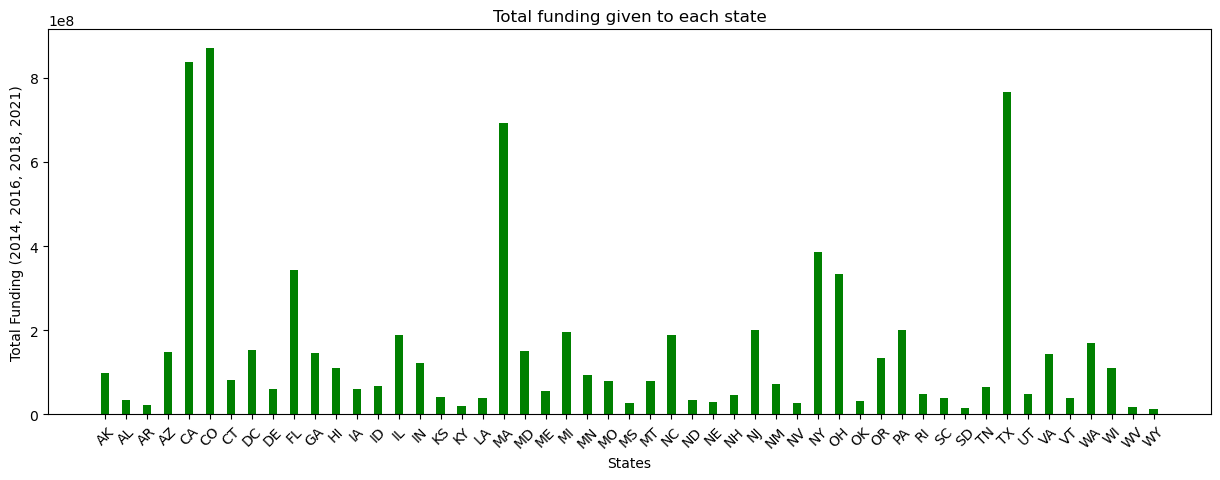

In [23]:
plt.figure(figsize = (15, 5))
plt.bar(st_fund_sum['State'], st_fund_sum['Funding'], color ='green',width = 0.4)

plt.xticks(rotation=45)
plt.xlabel("States")
plt.ylabel("Total Funding (2014, 2016, 2018, 2021)")
plt.title("Total funding given to each state")
plt.show()

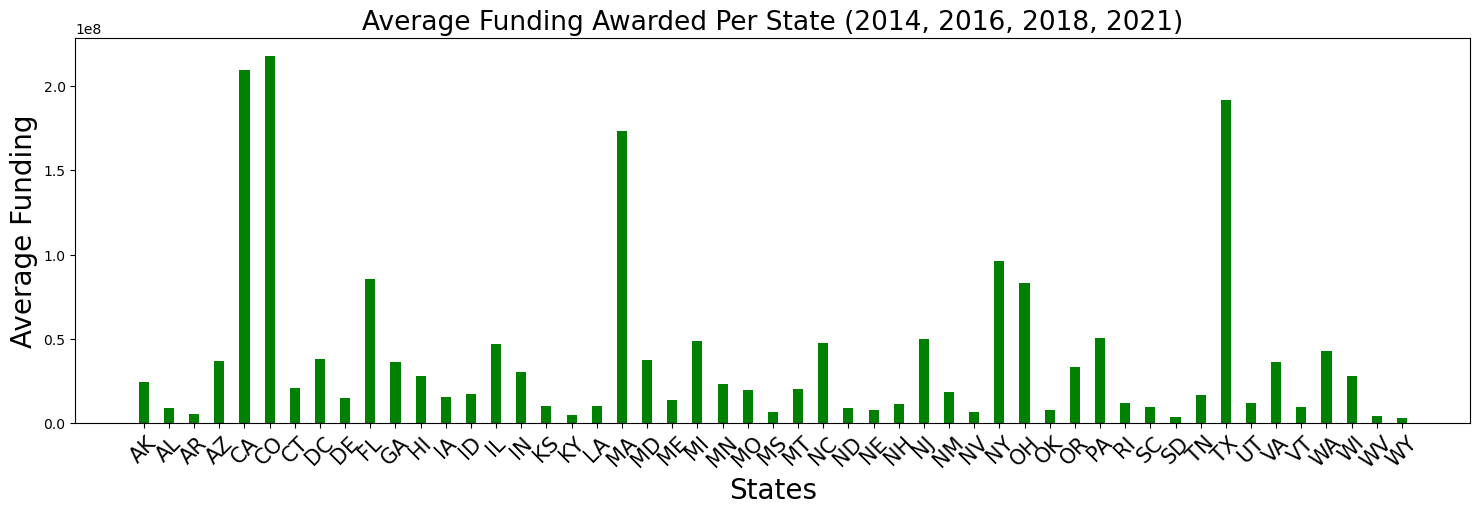

In [25]:
plt.figure(figsize = (18, 5))
plt.bar(st_fund_avg['State'], st_fund_avg['Funding'], color ='green',width = 0.4)

plt.xticks(rotation=45, fontsize = 15)
plt.xlabel("States", fontsize = 20)
plt.ylabel("Average Funding", fontsize = 20)
plt.title("Average Funding Awarded Per State (2014, 2016, 2018, 2021)", fontsize = 19)
plt.show()

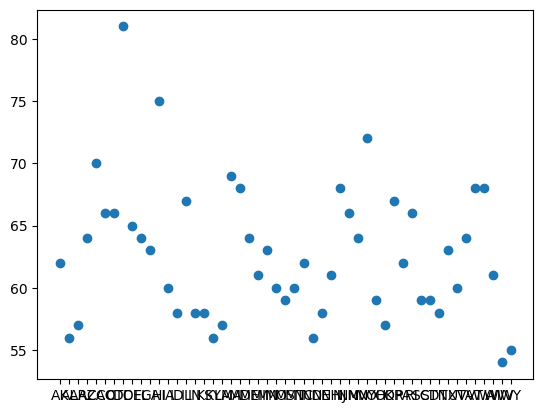

In [27]:
# plt.scatter(merged['year'], merged['happening'])
m14 = merged[merged['year'] == '2014']
plt.scatter(m14['State'], m14['happening'])

In [28]:
merged

,year,State,happening,harmUS,timing,personal,futuregen,worried,human,fundrenewables,regulate,CO2limits,Funding
0,2014,AK,62.000,45.000,41.000,29.000,55.000,48.000,45.000,76.000,67.000,48.000,21278921
1,2014,AL,56.000,45.000,40.000,31.000,53.000,46.000,43.000,73.000,69.000,53.000,8717289
2,2014,AR,57.000,46.000,39.000,31.000,55.000,47.000,44.000,73.000,71.000,59.000,4822559
3,2014,AZ,64.000,53.000,44.000,38.000,61.000,54.000,49.000,76.000,74.000,64.000,31581325
4,2014,CA,70.000,59.000,48.000,42.000,70.000,62.000,55.000,79.000,79.000,72.000,163491175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021,VA,74.246,66.264,61.864,47.914,72.833,67.593,59.283,79.736,73.235,69.422,38258385
200,2021,WA,75.379,68.805,62.891,48.125,76.331,68.291,60.097,78.954,72.999,69.846,52157584
201,2021,WV,56.918,50.727,45.077,32.924,57.075,49.865,42.603,70.574,62.749,47.461,5495792
202,2021,WI,69.452,62.011,55.557,42.428,70.049,61.549,55.104,77.934,72.360,64.875,35490091


### Visualize

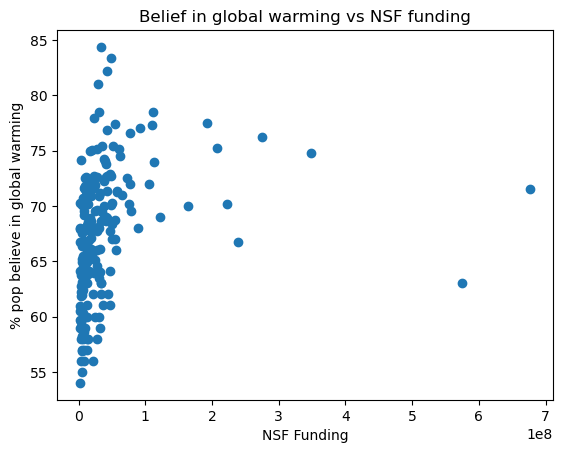

In [29]:
# plt.scatter(merged.happening, merged.Funding)
# plt.ylabel('NSF Funding')
# plt.xlabel('% pop believe in global warming')
# plt.title('Belief in global warming vs NSF funding')
# plt.show()

plt.scatter(merged.Funding, merged.happening)
plt.xlabel('NSF Funding')
plt.ylabel('% pop believe in global warming')
plt.title('Belief in global warming vs NSF funding')
plt.show()

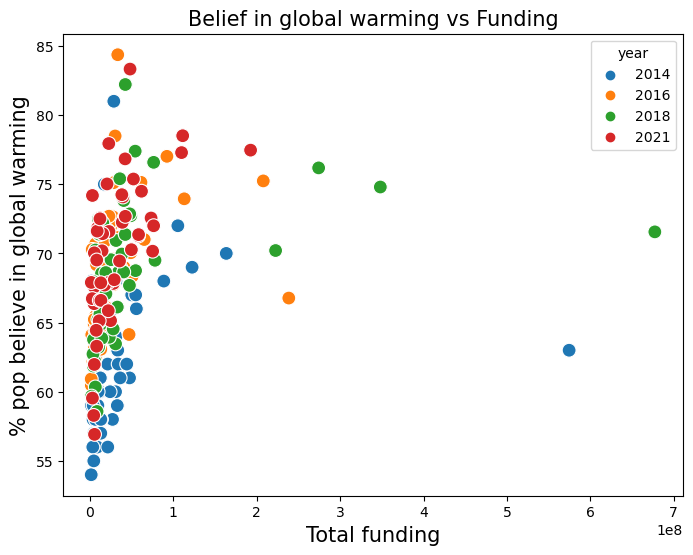

In [30]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'Funding', y = 'happening', data=merged, hue='year', s=100)
plt.xlabel('Total funding',fontsize = 15)
plt.ylabel('% pop believe in global warming',fontsize = 15)
plt.title('Belief in global warming vs Funding',fontsize = 15)
plt.show()

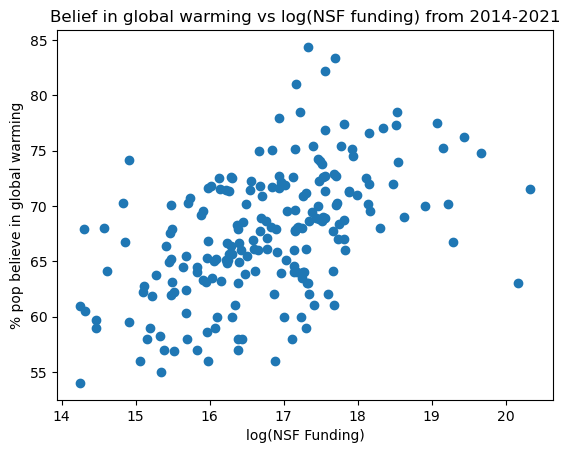

In [31]:
log_happening = np.log(merged.happening)
log_funding = np.log(merged.Funding)

plt.scatter(log_funding, merged.happening) #x,y
plt.xlabel('log(NSF Funding)')
plt.ylabel('% pop believe in global warming')
plt.title('Belief in global warming vs log(NSF funding) from 2014-2021')
plt.show()

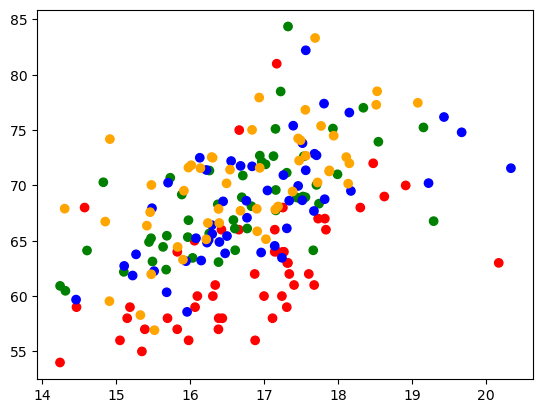

In [32]:
fig, ax = plt.subplots()

colors = {'2014':'red', '2016':'green', '2018':'blue', '2021':'orange'}


ax.scatter(log_funding, merged.happening, c=merged['year'].map(colors))
# ax.legend()
plt.show()

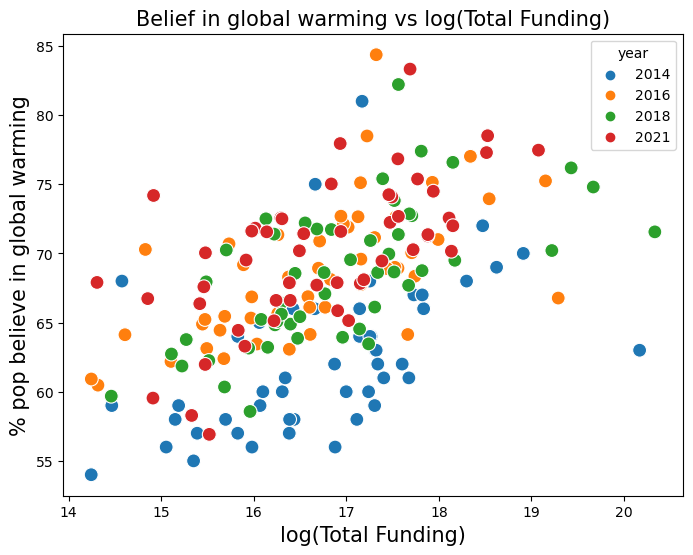

In [33]:
merged['log_funding'] = np.log(merged.Funding)
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'log_funding', y = 'happening', data=merged, hue='year', s=100)
plt.xlabel('log(Total Funding)',fontsize = 15)
plt.ylabel('% pop believe in global warming',fontsize = 15)
plt.title('Belief in global warming vs log(Total Funding)',fontsize = 15)
plt.show()

Text(0.5, 0, 'Funding')

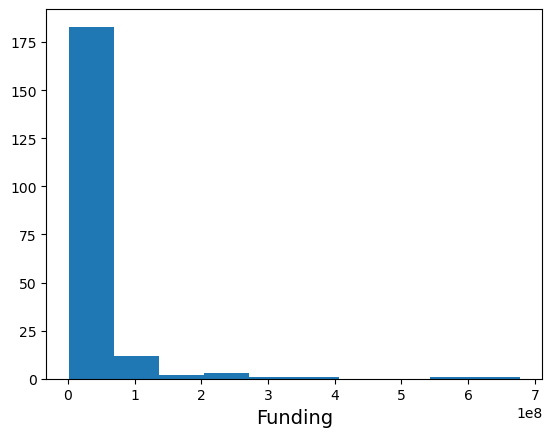

In [34]:
plt.hist(merged.Funding)
plt.xlabel('Funding',fontsize=14)

Text(0.5, 0, 'log(Funding)')

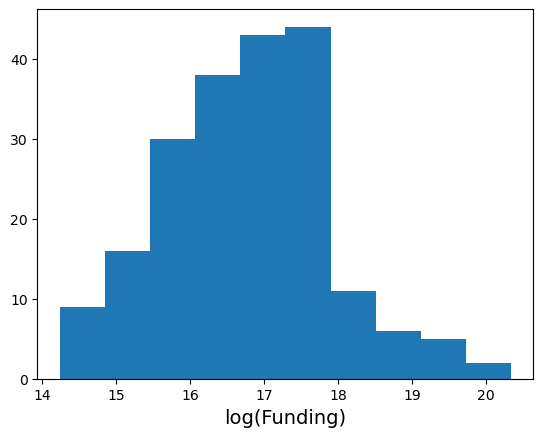

In [35]:
plt.hist(merged['log_funding'])
plt.xlabel('log(Funding)',fontsize=14)

Text(0.5, 0, '% population believes climate change is happening')

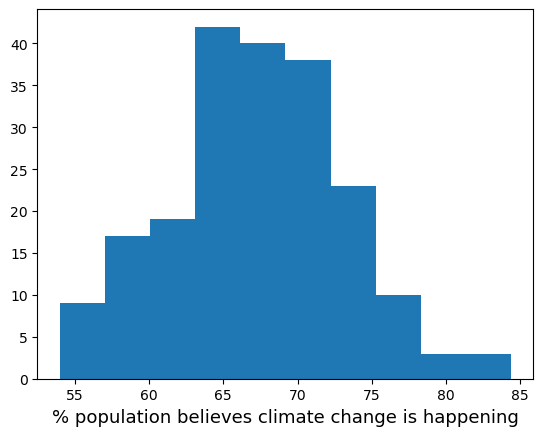

In [36]:
plt.hist(merged['happening'])
plt.xlabel('% population believes climate change is happening',fontsize=13)

Year: 2014


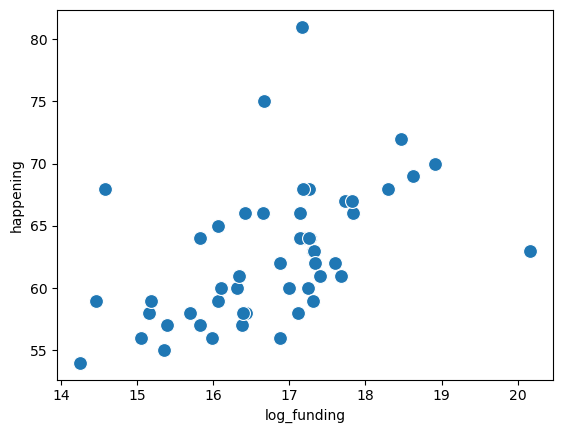

Year: 2016


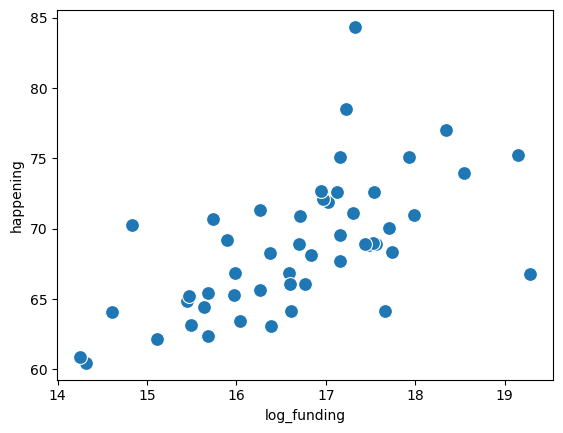

Year: 2018


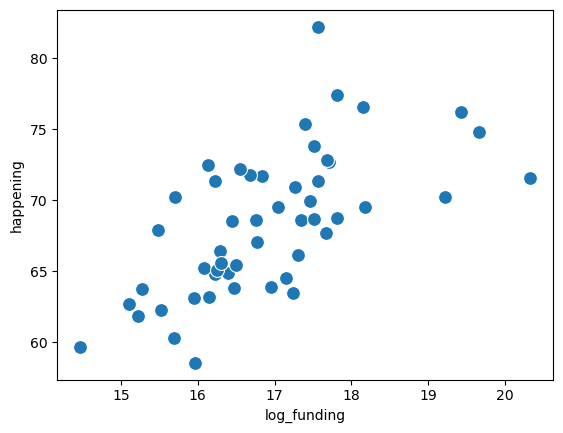

Year: 2021


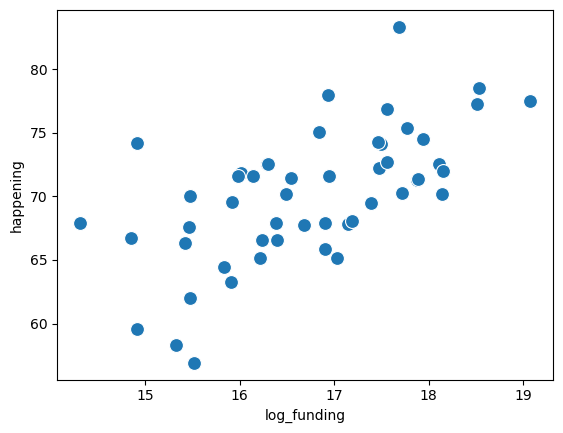

In [37]:
# merged_14 = merged[merged.year == '2014']
years = np.unique(merged.year).tolist()
for yr in years:
    df = merged[merged.year == yr]
    print("Year:", yr)
    sns.scatterplot(x = 'log_funding', y = 'happening', data=df,s=100)
    plt.show()

### Simple linear regression

In [44]:
# from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
# # x2 = sm.add_constant(X)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, 
#                                                     test_size = 0.2, # 20% of the data is in the test set and 80% of the data is in the training set
#                                                     random_state = 0)# To ensure consistency in answer across students, we will randomly select the same observations

In [38]:
X = merged.log_funding
Y = merged.happening

In [46]:
# X_test.iloc[:]

plt.ylabel('% population believe in global warming',fontsize = 19)
plt.title('% population believe in global warming vs log(Total Funding) [State-level]',fontsize = 19)

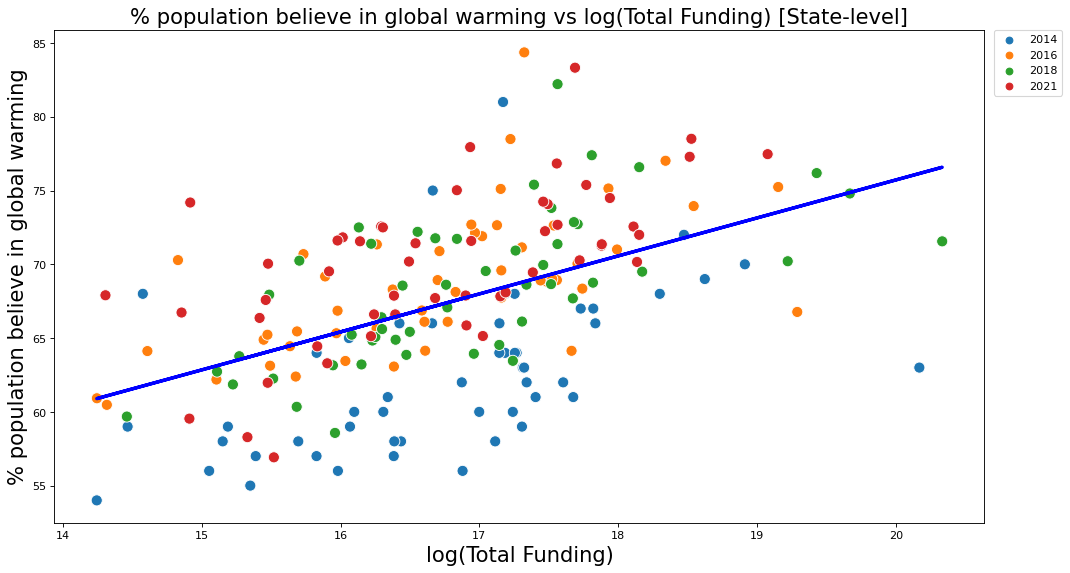

In [42]:
x2 = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(x2, Y, test_size = 0.2, random_state = 0)

# Fit the simple linear regression
sm_model = sm.OLS(y_train, X_train, missing='drop')
results = sm_model.fit()

# Make predictions using the linear regression
y_pred_x2 = results.predict(x2)
y_pred = results.predict(X_test)


# Plot 
xtest = np.array(X_test.iloc[:,-1:])
plt.figure(figsize=(15, 8), dpi=80)
p1 = sns.scatterplot(x = 'log_funding', y = 'happening', data=merged, hue='year', s=100)
p1.legend(bbox_to_anchor=(1.01,1.0), loc='upper left', borderaxespad=0)#,borderaxespad = 0., ncol = 1)
plt.plot(X, y_pred_x2, color='blue', linewidth=3)
# plt.plot(xtest, y_pred, color='red', linewidth=5)
plt.xlabel('log(Total Funding)',fontsize = 19)
plt.ylabel('% population believe in global warming',fontsize = 19)
plt.title('% population believe in global warming vs log(Total Funding) [State-level]',fontsize = 19)
plt.show()

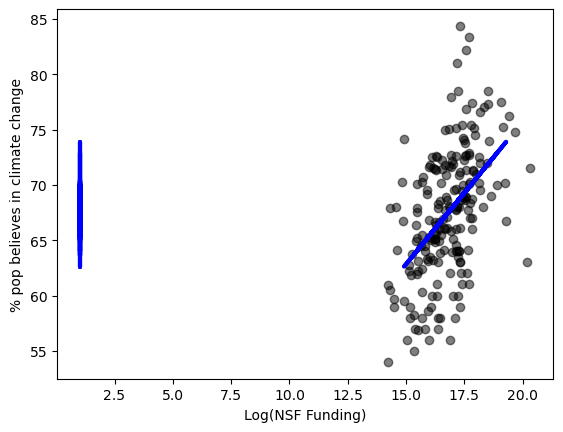

In [48]:
# import statsmodels.api as sm

# In order to have an intercept, we need to add a column of 1's to X
x2_tr = sm.add_constant(X_train)
x2_te = sm.add_constant(X_test)

# Fit the simple linear regression
sm_model = sm.OLS(y_train, x2_tr)
results = sm_model.fit()

# Make predictions using the linear regression
y_pred = results.predict(x2_te)
# Plot 
# xtest = np.array(X_test.iloc[:,-1:])
plt.scatter(X, Y,  color='black', alpha = 0.50)
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Log(NSF Funding)')
plt.ylabel('% pop believes in climate change')
plt.show()

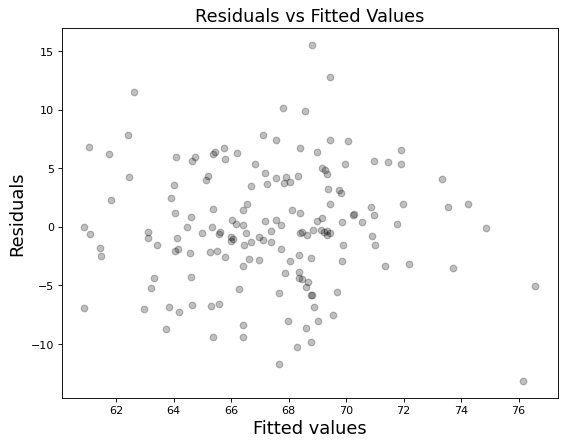

In [49]:
resids = results.resid
y_pred = results.predict(x2_tr)
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(y_pred, resids,  color='black', alpha = 0.25)
plt.xlabel('Fitted values',fontsize = 16)
plt.ylabel('Residuals',fontsize = 16)
plt.title('Residuals vs Fitted Values',fontsize = 16)
plt.show()

In [56]:
shapiro(resids)[1]

0.5505221486091614

In [50]:
y_pred = results.predict(x2_te)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              happening   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     58.82
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.55e-12
Time:                        02:54:57   Log-Likelihood:                -492.95
No. Observations:                 163   AIC:                             989.9
Df Residuals:                     161   BIC:                             996.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.2208      5.640      4.295      

In [51]:
results.mse_model

1476.458703918222

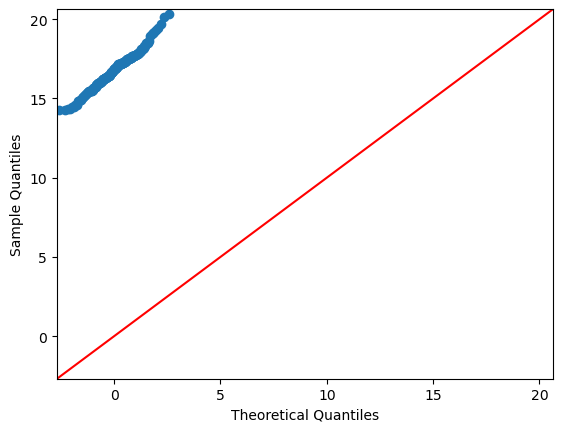

In [52]:
import pylab as py
  
# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.
  
# Random data points generated
# data_points = np.random.normal(0, 1, 100)    
  
sm.qqplot(X, line ='45')
py.show()

In [53]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array(merged.log_funding).reshape(-1, 1)
y = np.array(merged.happening).reshape(-1, 1)

# X = merged.log_funding
# Y = merged.happening
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
merged.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.2017630186994669


In [54]:
y_pred = regr.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

21.710956573794697


### LR by year

In [65]:
def linear_regression_plot (x, y, x_name, y_name, data_name, xlabel, ylabel):

    x2 = sm.add_constant(x)
    X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size = 0.1, random_state = 0)

    # Fit the simple linear regression
    sm_model = sm.OLS(y_train, X_train, missing='drop')
    results = sm_model.fit()

    # Make predictions using the linear regression
    y_pred_x2 = results.predict(x2)
    y_pred = results.predict(X_test)
    
    #extract p-value for specific predictor variable name
    p_val_x = results.pvalues.loc[x_name]
    
    not_sig_ind = []
    sig_ind = []
    resids_not_normal = []
    
    if p_val_x < 0.05:
        sig_ind = xlabel
        yes = 'yes'
        no = 'NA'
        
        print(y_name+' vs '+x_name)
        # Plot 
        xtest = np.array(X_test.iloc[:,-1:])
        plt.figure(figsize=(15, 8), dpi=80)
        p1 = sns.scatterplot(x = x_name, y = y_name, data = data_name, s=100)
        plt.plot(x, y_pred_x2, color='blue', linewidth=3)
#         plt.plot(xtest, y_pred, color='red', linewidth=5)
        plt.xlabel(xlabel, fontsize=13)
        plt.ylabel(ylabel, fontsize=13)
        plt.title(ylabel +' vs. '+xlabel, fontsize=15)

        plt.show()
        
        
        print(results.summary())
        print('==============================================')
        
        
        #checking assumptions
        #plot residuals
        print()
        print("Residuals vs Fitted Values-- looking for heteroskedascity")
        resids = results.resid
#         y_pred = results.predict(X_train)
        fitted_vals = results.fittedvalues
        plt.scatter(fitted_vals, resids, color='black', alpha = 0.25)
#         plt.scatter(y_pred, resids,  color='black', alpha = 0.25)
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Fitted Values')
        plt.show()
        
        #qq plot for normality of residuals
        print('Residuals-- checking normality')
        sm.qqplot(resids, line='s') #get p values
        plt.show()
        
        if shapiro(resids)[1] < 0.05:
            print('Residuals are not normal')
            
            resids_not_normal = xlabel
        
        print('=========================================================================================')
        
    
    else:
        not_sig_ind = xlabel
    
    print('=========================================================================================')
    
    return sig_ind, not_sig_ind, resids_not_normal

happening vs log_funding


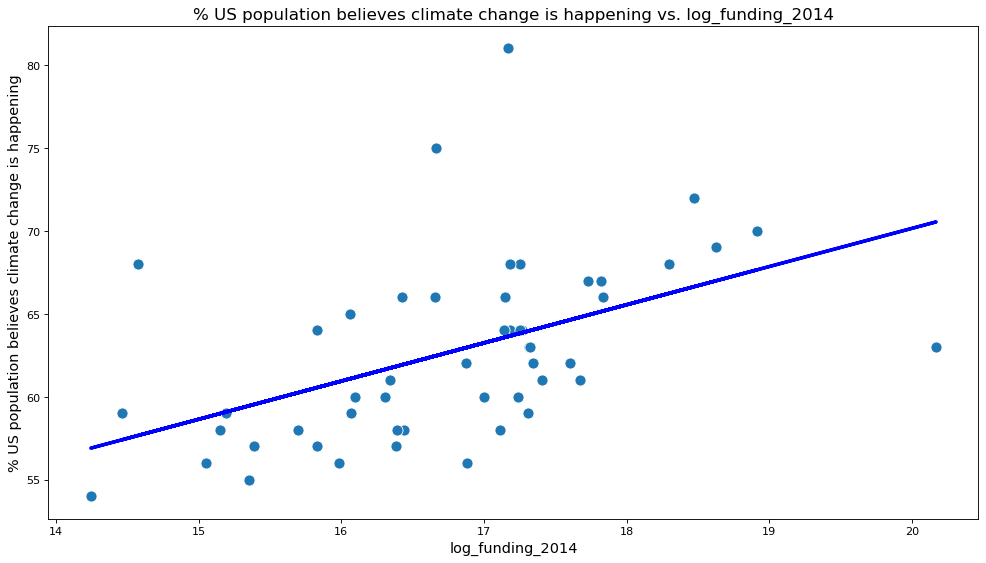

                            OLS Regression Results                            
Dep. Variable:              happening   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     16.85
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           0.000177
Time:                        13:16:16   Log-Likelihood:                -130.11
No. Observations:                  45   AIC:                             264.2
Df Residuals:                      43   BIC:                             267.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.1156      9.437      2.555      

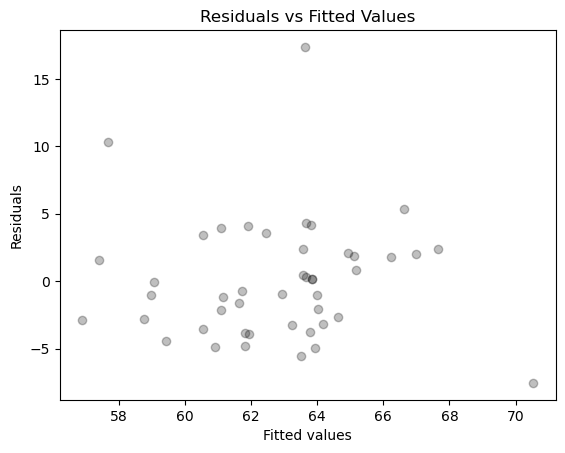

Residuals-- checking normality


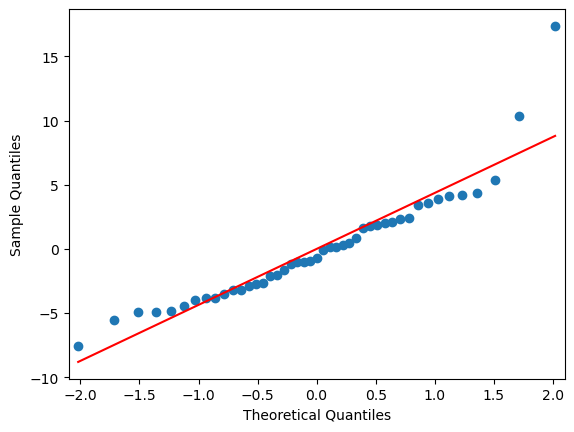

Residuals are not normal
happening vs log_funding


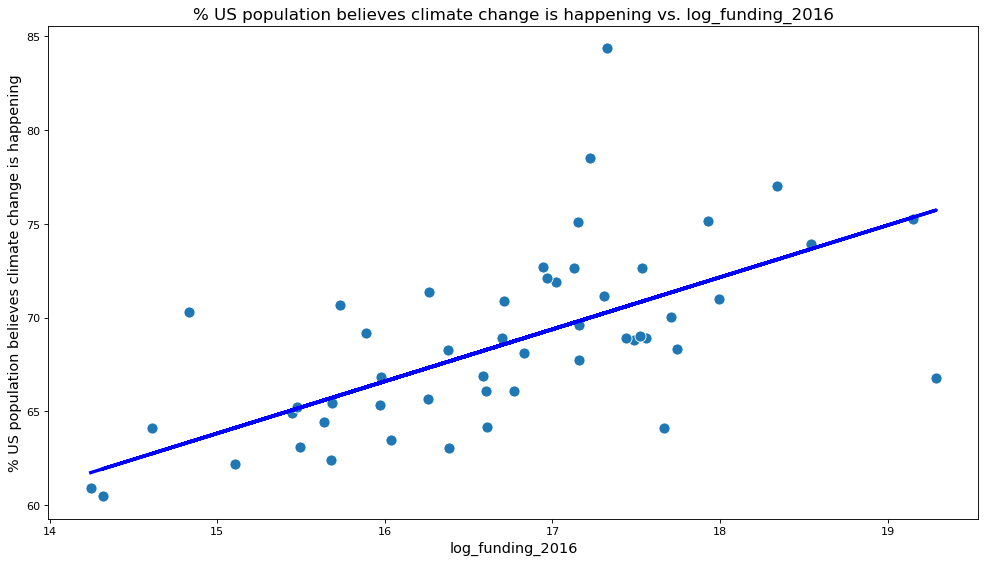

                            OLS Regression Results                            
Dep. Variable:              happening   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     33.16
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           8.20e-07
Time:                        13:16:17   Log-Likelihood:                -121.39
No. Observations:                  45   AIC:                             246.8
Df Residuals:                      43   BIC:                             250.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.2201      8.055      2.759      

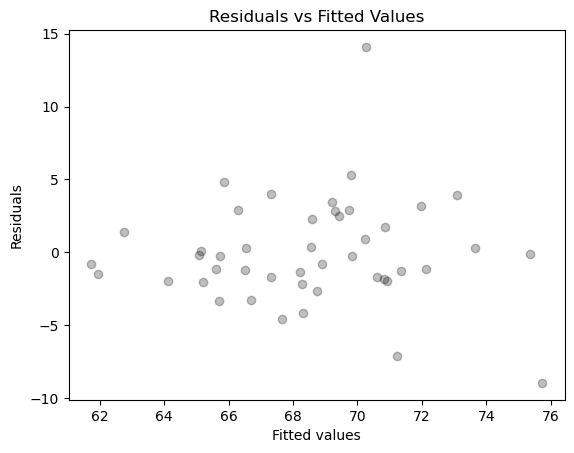

Residuals-- checking normality


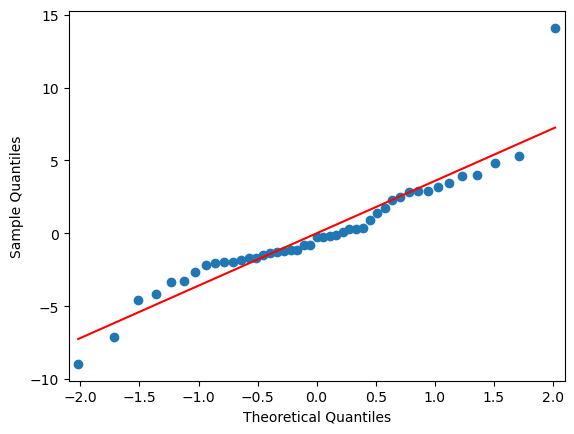

Residuals are not normal
happening vs log_funding


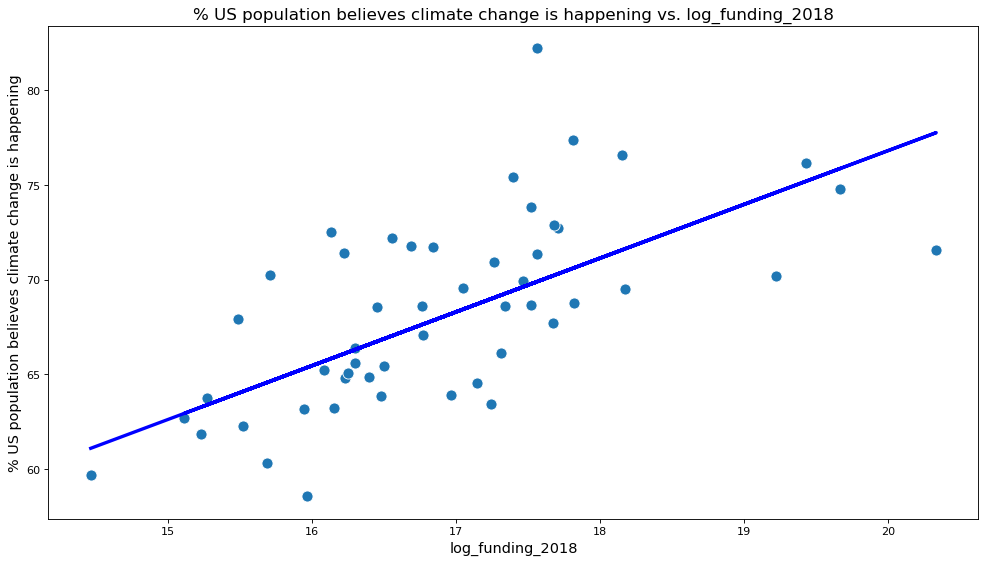

                            OLS Regression Results                            
Dep. Variable:              happening   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     34.97
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           4.89e-07
Time:                        13:16:18   Log-Likelihood:                -123.25
No. Observations:                  45   AIC:                             250.5
Df Residuals:                      43   BIC:                             254.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.0988      8.132      2.472      

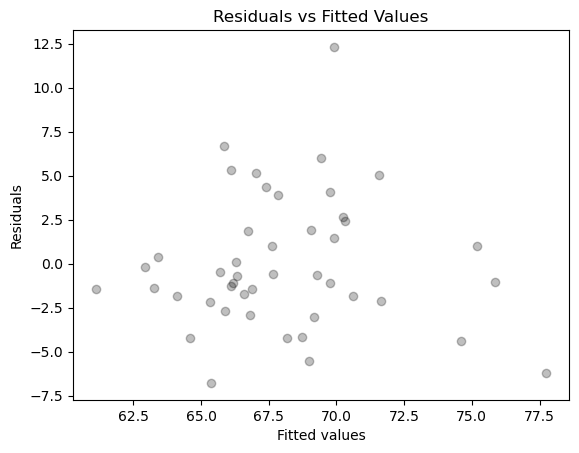

Residuals-- checking normality


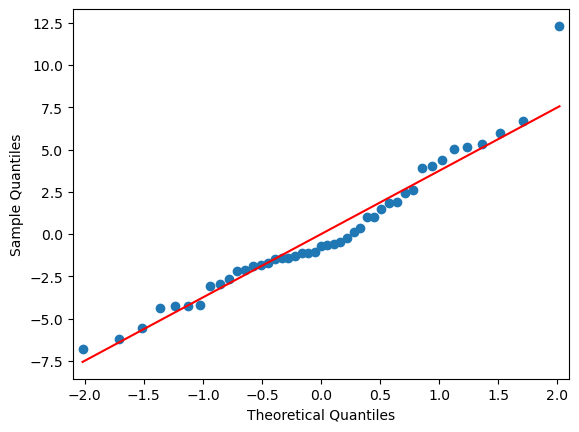

happening vs log_funding


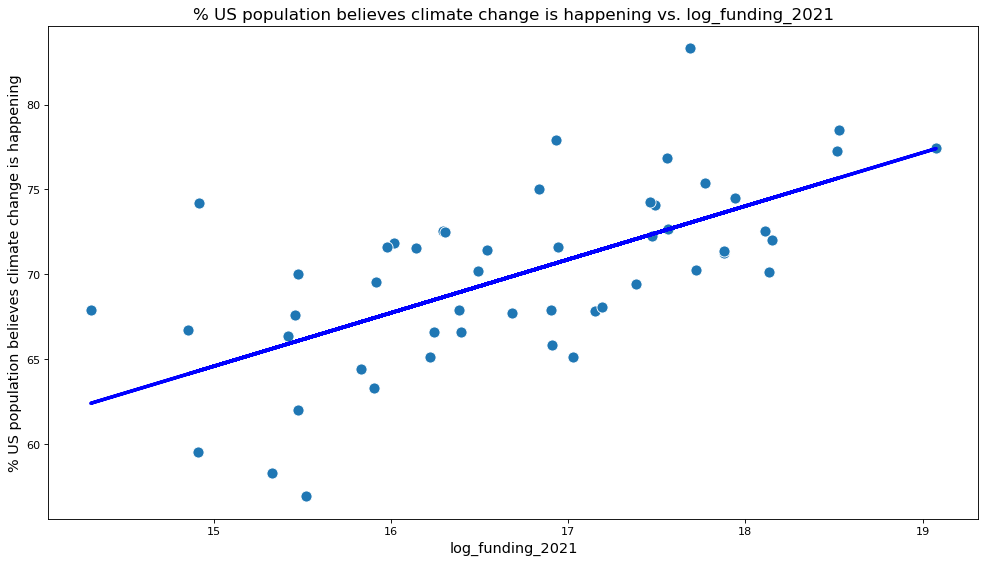

                            OLS Regression Results                            
Dep. Variable:              happening   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     30.49
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.81e-06
Time:                        13:16:18   Log-Likelihood:                -128.08
No. Observations:                  45   AIC:                             260.2
Df Residuals:                      43   BIC:                             263.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.3518      9.543      1.818      

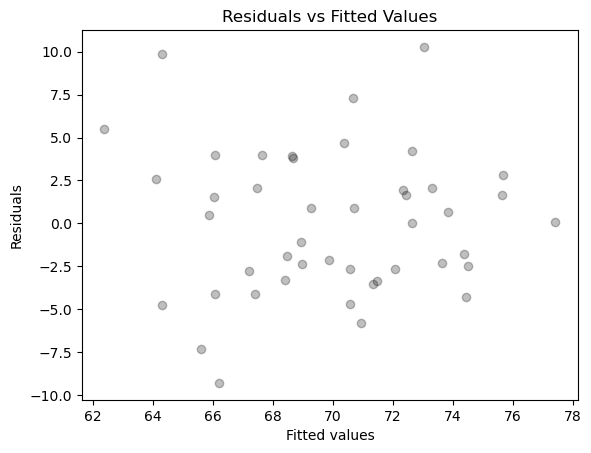

Residuals-- checking normality


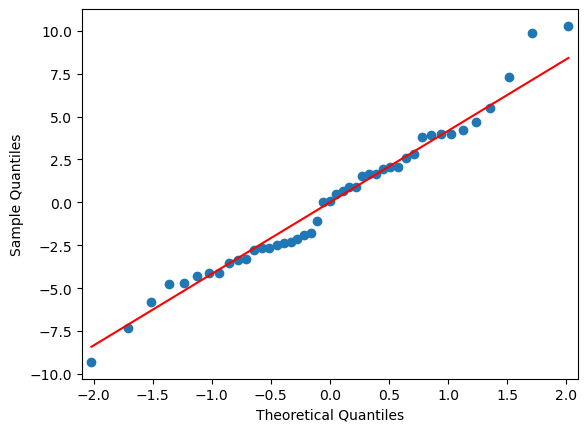

Significant regression for:  ['log_funding_2014', 'log_funding_2016', 'log_funding_2018', 'log_funding_2021']

Not significant regression for:  [[], [], [], []]


Residuals are not normal when (% pop belief in climate change) plotted against ['log_funding_2014', 'log_funding_2016', [], []]


In [66]:
significant = []
not_significant = []
resid_not_norm_y = []

years = list(merged.year.unique())
for y in years:
    temp_df = merged[merged.year == y]
    temp_df = temp_df[['happening','log_funding']]
#     temp_df[i] = temp_df[i].astype(float)
    
    x_col = temp_df['log_funding']
    y_col = temp_df['happening']
    
    sig, not_sig, resids_not_normal = linear_regression_plot(x_col, y_col, 'log_funding', 'happening', temp_df, 'log_funding_'+str(y),'% US population believes climate change is happening')
    significant.append(sig)
    not_significant.append(not_sig)
    resid_not_norm_y.append(resids_not_normal)


print('Significant regression for: ',significant)
print()
print('Not significant regression for: ',not_significant)
print()
print()
print('Residuals are not normal when (% pop belief in climate change) plotted against', resid_not_norm_y)

In [60]:
#resdiuals normal for 2014 and 2021

In [ ]:
##quantile regression by year